In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import Normalizer, normalize

In [2]:
df = pd.read_csv('dataset/diabetes.csv')

df = df.drop('Outcome', axis = 1)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
l2_normalize_df = pd.DataFrame(normalize(df, norm = 'l2'), columns = df.columns)

In [7]:
l2_normalize_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [8]:
l2_normalize_df.iloc[0].pow(2)

Pregnancies                 0.001126
Glucose                     0.684963
BloodPressure               0.162110
SkinThickness               0.038307
Insulin                     0.000000
BMI                         0.035304
DiabetesPedigreeFunction    0.000012
Age                         0.078178
Name: 0, dtype: float64

In [9]:
math.sqrt(l2_normalize_df.iloc[0].pow(2).sum())

1.0

In [10]:
math.sqrt(l2_normalize_df.iloc[13].pow(2).sum())

0.9999999999999999

In [12]:
l1_normalized_df = pd.DataFrame(normalize(df, norm = 'l1'), columns = df.columns)

l1_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.017380,0.428703,0.208558,0.101383,0.000000,0.097327,0.001816,0.144832
1,0.004185,0.355721,0.276207,0.121364,0.000000,0.111320,0.001469,0.129734
2,0.025726,0.588477,0.205806,0.000000,0.000000,0.074926,0.002161,0.102903
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


In [15]:
math.sqrt(l1_normalized_df.iloc[0].abs().sum())

0.9999999999999999

In [16]:
math.sqrt(l1_normalized_df.iloc[31].abs().sum())

1.0

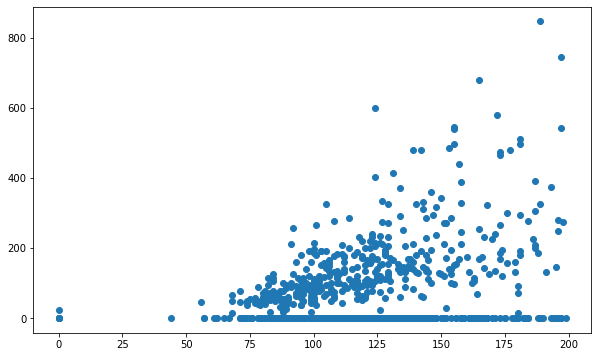

In [17]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.scatter(df['Glucose'], df['Insulin'])

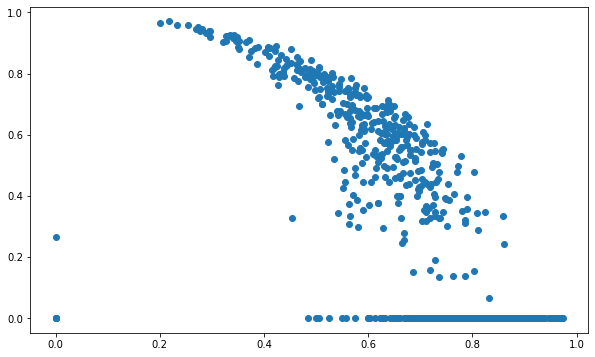

In [19]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.scatter(l2_normalize_df['Glucose'], l2_normalize_df['Insulin'])

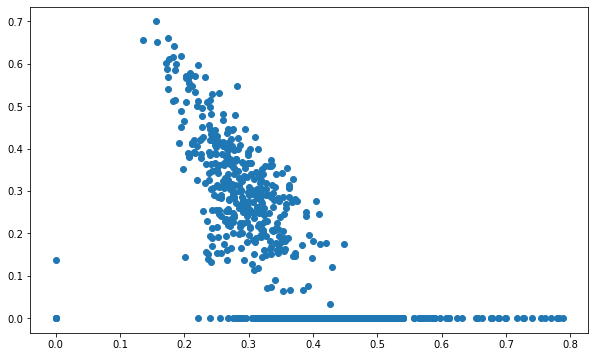

In [20]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.scatter(l1_normalized_df['Glucose'], l1_normalized_df['Insulin'])

In [21]:
max_normalize_df = pd.DataFrame(normalize(df, norm = 'max'), columns = df.columns)

max_normalize_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.040541,1.000000,0.486486,0.236486,0.0,0.227027,0.004236,0.337838
1,0.011765,1.000000,0.776471,0.341176,0.0,0.312941,0.004129,0.364706
2,0.043716,1.000000,0.349727,0.000000,0.0,0.127322,0.003672,0.174863
3,0.010638,0.946809,0.702128,0.244681,1.0,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.0,0.256548,0.013619,0.196429


In [22]:
df.iloc[0] / df.iloc[0].max()

Pregnancies                 0.040541
Glucose                     1.000000
BloodPressure               0.486486
SkinThickness               0.236486
Insulin                     0.000000
BMI                         0.227027
DiabetesPedigreeFunction    0.004236
Age                         0.337838
Name: 0, dtype: float64

In [23]:
df.iloc[[8,10,11]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
8,2,197,70,45,543,30.5,0.158,53
10,4,110,92,0,0,37.6,0.191,30
11,10,168,74,0,0,38.0,0.537,34


In [24]:
cosine_similarity(df.iloc[10].values.reshape(1, -1), df.iloc[11].values.reshape(1, -1))

array([[0.96221582]])

In [25]:
cosine_similarity(df.iloc[8].values.reshape(1, -1), df.iloc[10].values.reshape(1, -1))

array([[0.34751949]])